In [1]:
# importing the libraries
import json
import nltk
import random
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tag import pos_tag
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


In [2]:
# Downloading NLTK resources, only for first time
# nltk.download('stopwords')

In [3]:
# Load the intents dataset from a JSON file
with open('chatbot_dataset.json', 'r') as file:
    intents = json.load(file)['intents']


In [4]:
# Convert the intents data into a DataFrame
df = pd.DataFrame(intents)

## Data Exploration and Cleaning 

In [5]:
# Displaying concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        105 non-null    object
 1   patterns   105 non-null    object
 2   responses  105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [6]:
# Displaying the first 10 rows of the DataFrame
df.head(10)

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,feeling-good,"[I am feeling well, I feel good, I am doing be...","[Thats great to hear, how can I help you?]"
3,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
4,evening,[Good evening],[Good evening. How has your day been?]
5,night,[Good night],"[Good night. Get some proper sleep, Good night..."
6,goodbye,"[Bye, See you later, Goodbye, Au revoir, Sayon...","[See you later., Have a nice day., Bye! Come b..."
7,thanks,"[Thanks, Thank you, That's helpful, Thanks for...","[Happy to help!, Any time!, My pleasure, You'r..."
8,neutral-response,[nothing much],[Oh I see. Do you want to talk about something?]
9,about,"[Who are you?, What are you?, Who you are?, Te...","[I'm Pandora, your Personal Therapeutic AI Ass..."


In [7]:
# checking for NaN values
df.isna().sum()

tag          0
patterns     0
responses    0
dtype: int64

In [8]:
# droping the NaN values
df.dropna()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,feeling-good,"[I am feeling well, I feel good, I am doing be...","[Thats great to hear, how can I help you?]"
3,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
4,evening,[Good evening],[Good evening. How has your day been?]
...,...,...,...
100,fact-52,"[Can pets contribute to mental well-being?, Wh...",[Having pets can positively impact mental well...
101,fact-53,[What's the influence of cultural engagement o...,"[Engaging in cultural activities, such as art ..."
102,fact-54,[Is there a relationship between learning and ...,[Continuous learning positively influences men...
103,fact-55,[What's the impact of setting boundaries on me...,[Setting healthy boundaries is crucial for men...


In [9]:
len(df['patterns'])

105

In [10]:
len(df['responses'])

105

In [11]:
# combining all patterns from list into one
all_patterns = [' '.join(pattern) for pattern in df['patterns']]
df['patterns_combined'] = all_patterns

In [12]:
df.head(10)

,tag,patterns,responses,patterns_combined
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...,Hi Hey Is anyone there? Hi there Hello Hey the...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...,Good morning
2,feeling-good,"[I am feeling well, I feel good, I am doing be...","[Thats great to hear, how can I help you?]",I am feeling well I feel good I am doing bette...
3,afternoon,[Good afternoon],[Good afternoon. How is your day going?],Good afternoon
4,evening,[Good evening],[Good evening. How has your day been?],Good evening
5,night,[Good night],"[Good night. Get some proper sleep, Good night...",Good night
6,goodbye,"[Bye, See you later, Goodbye, Au revoir, Sayon...","[See you later., Have a nice day., Bye! Come b...",Bye See you later Goodbye Au revoir Sayonara o...
7,thanks,"[Thanks, Thank you, That's helpful, Thanks for...","[Happy to help!, Any time!, My pleasure, You'r...",Thanks Thank you That's helpful Thanks for the...
8,neutral-response,[nothing much],[Oh I see. Do you want to talk about something?],nothing much
9,about,"[Who are you?, What are you?, Who you are?, Te...","[I'm Pandora, your Personal Therapeutic AI Ass...",Who are you? What are you? Who you are? Tell m...


In [13]:
# creating flat words
words = []
for each in df['patterns_combined']:
    words.append(each.lower().replace(".", "").replace(",","").replace("?","").replace("!", "").split())

flat_words = [word for sublist in words for word in sublist]
flat_words

['hi',
 'hey',
 'is',
 'anyone',
 'there',
 'hi',
 'there',
 'hello',
 'hey',
 'there',
 'howdy',
 'hola',
 'bonjour',
 'konnichiwa',
 'guten',
 'tag',
 'ola',
 'good',
 'morning',
 'i',
 'am',
 'feeling',
 'well',
 'i',
 'feel',
 'good',
 'i',
 'am',
 'doing',
 'better',
 'than',
 'ever',
 'i',
 'think',
 'i',
 'am',
 'awesome',
 'good',
 'afternoon',
 'good',
 'evening',
 'good',
 'night',
 'bye',
 'see',
 'you',
 'later',
 'goodbye',
 'au',
 'revoir',
 'sayonara',
 'ok',
 'bye',
 'bye',
 'then',
 'fare',
 'thee',
 'well',
 'thanks',
 'thank',
 'you',
 "that's",
 'helpful',
 'thanks',
 'for',
 'the',
 'help',
 'thank',
 'you',
 'very',
 'much',
 'nothing',
 'much',
 'who',
 'are',
 'you',
 'what',
 'are',
 'you',
 'who',
 'you',
 'are',
 'tell',
 'me',
 'more',
 'about',
 'yourself',
 'what',
 'is',
 'your',
 'name',
 'what',
 'should',
 'i',
 'call',
 'you',
 "what's",
 'your',
 'name',
 'tell',
 'me',
 'about',
 'yourself',
 'what',
 'can',
 'you',
 'do',
 'who',
 'created',
 'you'

In [14]:
# Calculating word frequency
def calc_frequency(word_list):
    freq_dist = FreqDist(word_list)
    print(freq_dist.most_common(15))
    plt.figure(figsize=(5, 3))
    freq_dist.plot(15, cumulative=False)

[('i', 103), ('mental', 73), ('health', 46), ('you', 38), ('what', 34), ('to', 31), ('can', 28), ('how', 27), ('about', 22), ('does', 22), ('is', 21), ('well-being', 21), ('am', 20), ('the', 20), ('me', 20)]


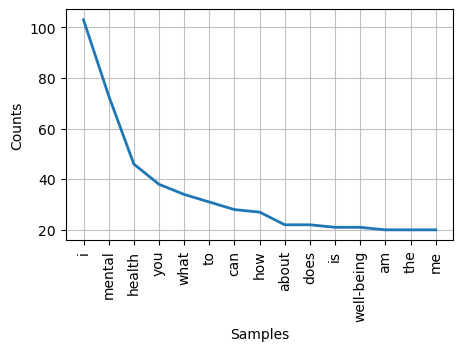

In [15]:
calc_frequency(flat_words)

## Preprocess Data

In [16]:
#removing punctuations from patterns
def remove_punctuations(text):
    punct_removed = text.lower().replace(".", "").replace(",","").replace("?","").replace("!", "").replace("'", "").split()
    return punct_removed
df['no_punct'] =df['patterns_combined'].apply(remove_punctuations)
df['no_punct']

0      [hi, hey, is, anyone, there, hi, there, hello,...
1                                        [good, morning]
2      [i, am, feeling, well, i, feel, good, i, am, d...
3                                      [good, afternoon]
4                                        [good, evening]
                             ...                        
100    [can, pets, contribute, to, mental, well-being...
101    [whats, the, influence, of, cultural, engageme...
102    [is, there, a, relationship, between, learning...
103    [whats, the, impact, of, setting, boundaries, ...
104    [can, engaging, in, hobbies, improve, mental, ...
Name: no_punct, Length: 105, dtype: object

In [17]:
#removing stopwords
def remove_stopwords(text):
    #making custom stopwords
    custom_stop_words = set(stopwords.words('english'))- {'who', 'what', 'where', 'when', 'why', 'how', 'which', 'define', 'yourself', 'you', "can", "do", "have", "my", "are" }
    
    tokens = [token for token in text if token not in custom_stop_words]
    return tokens
df['no_stopwords'] =df['no_punct'].apply(remove_stopwords)
df['no_stopwords']

0      [hi, hey, anyone, hi, hello, hey, howdy, hola,...
1                                        [good, morning]
2      [feeling, well, feel, good, better, ever, thin...
3                                      [good, afternoon]
4                                        [good, evening]
                             ...                        
100    [can, pets, contribute, mental, well-being, wh...
101    [whats, influence, cultural, engagement, menta...
102    [relationship, learning, mental, well-being, h...
103    [whats, impact, setting, boundaries, mental, h...
104    [can, engaging, hobbies, improve, mental, heal...
Name: no_stopwords, Length: 105, dtype: object

In [18]:
# displaying first 10 words to analyize the preprocessing procedure
df.head(10)


,tag,patterns,responses,patterns_combined,no_punct,no_stopwords
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...,Hi Hey Is anyone there? Hi there Hello Hey the...,"[hi, hey, is, anyone, there, hi, there, hello,...","[hi, hey, anyone, hi, hello, hey, howdy, hola,..."
1,morning,[Good morning],[Good morning. I hope you had a good night's s...,Good morning,"[good, morning]","[good, morning]"
2,feeling-good,"[I am feeling well, I feel good, I am doing be...","[Thats great to hear, how can I help you?]",I am feeling well I feel good I am doing bette...,"[i, am, feeling, well, i, feel, good, i, am, d...","[feeling, well, feel, good, better, ever, thin..."
3,afternoon,[Good afternoon],[Good afternoon. How is your day going?],Good afternoon,"[good, afternoon]","[good, afternoon]"
4,evening,[Good evening],[Good evening. How has your day been?],Good evening,"[good, evening]","[good, evening]"
5,night,[Good night],"[Good night. Get some proper sleep, Good night...",Good night,"[good, night]","[good, night]"
6,goodbye,"[Bye, See you later, Goodbye, Au revoir, Sayon...","[See you later., Have a nice day., Bye! Come b...",Bye See you later Goodbye Au revoir Sayonara o...,"[bye, see, you, later, goodbye, au, revoir, sa...","[bye, see, you, later, goodbye, au, revoir, sa..."
7,thanks,"[Thanks, Thank you, That's helpful, Thanks for...","[Happy to help!, Any time!, My pleasure, You'r...",Thanks Thank you That's helpful Thanks for the...,"[thanks, thank, you, thats, helpful, thanks, f...","[thanks, thank, you, thats, helpful, thanks, h..."
8,neutral-response,[nothing much],[Oh I see. Do you want to talk about something?],nothing much,"[nothing, much]","[nothing, much]"
9,about,"[Who are you?, What are you?, Who you are?, Te...","[I'm Pandora, your Personal Therapeutic AI Ass...",Who are you? What are you? Who you are? Tell m...,"[who, are, you, what, are, you, who, you, are,...","[who, are, you, what, are, you, who, you, are,..."


In [19]:
#removing negative and adding "not_" for the concurrent word to handle negations
def handle_negative(text):
    negation = False
    result = []

    for word in text:
        # Check if the word is a negation word
        if word in ["not", "no", "never","cant", "havent", "didnt", "hadnt", "dont", "hasnt", "isnt", "shouldnt", "werent", "wasnt", "doesnt"]:
            negation = not negation
        elif negation:
            # If in a negation context, prepend "not_" to the word
            result.append("not_" + word)
            negation = False # resetting the negation value
        else:
            # if not negation, add the word without modifications
            result.append(word)

    return result

df['no_negative'] =df['no_stopwords'].apply(handle_negative)
df['no_negative']

0      [hi, hey, anyone, hi, hello, hey, howdy, hola,...
1                                        [good, morning]
2      [feeling, well, feel, good, better, ever, thin...
3                                      [good, afternoon]
4                                        [good, evening]
                             ...                        
100    [can, pets, contribute, mental, well-being, wh...
101    [whats, influence, cultural, engagement, menta...
102    [relationship, learning, mental, well-being, h...
103    [whats, impact, setting, boundaries, mental, h...
104    [can, engaging, hobbies, improve, mental, heal...
Name: no_negative, Length: 105, dtype: object

In [20]:
# taking only important words into consideration, excluding words like uhh, yeah, oh 
def important_words(text):
    important_words = []    
    tags = ['VB', 'VBP', 'VBD', 'VBG', 'VBN', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'UH', 'NN', 'NNP', 'IN', 'NNS', 'PRP$', 'PRP', 'WP']    
    tag_word = pos_tag(text)
    for word in tag_word:            
        if word[1] in tags:
            important_words.append(word[0])
    return important_words 
df['important_word_list'] =df['no_negative'].apply(important_words)
df['important_word_list']

0      [hi, hey, anyone, hi, hello, hey, howdy, hola,...
1                                        [good, morning]
2      [feeling, well, feel, good, better, ever, thin...
3                                      [good, afternoon]
4                                        [good, evening]
                             ...                        
100    [pets, contribute, mental, well-being, whats, ...
101    [whats, influence, cultural, engagement, menta...
102    [relationship, learning, mental, well-being, c...
103    [whats, impact, setting, boundaries, mental, h...
104    [engaging, hobbies, improve, mental, health, p...
Name: important_word_list, Length: 105, dtype: object

In [21]:
# formring lemmas of words
def lemm_word(text):
    lemmatizer = WordNetLemmatizer()
    lemm_words = [lemmatizer.lemmatize(word) for word in text]
    return lemm_words
    
df['lemm_word_list'] =df['important_word_list'].apply(lemm_word)
df['lemm_word_list']

0      [hi, hey, anyone, hi, hello, hey, howdy, hola,...
1                                        [good, morning]
2      [feeling, well, feel, good, better, ever, thin...
3                                      [good, afternoon]
4                                        [good, evening]
                             ...                        
100    [pet, contribute, mental, well-being, whats, i...
101    [whats, influence, cultural, engagement, menta...
102    [relationship, learning, mental, well-being, c...
103    [whats, impact, setting, boundary, mental, hea...
104    [engaging, hobby, improve, mental, health, pur...
Name: lemm_word_list, Length: 105, dtype: object

In [22]:
# combining the preprocessed words into a sentence
def join_words(text):
    word=" ".join(text)
    return word
df['final_list'] =df['lemm_word_list'].apply(join_words)
df['final_list']

0      hi hey anyone hi hello hey howdy hola bonjour ...
1                                           good morning
2       feeling well feel good better ever think awesome
3                                         good afternoon
4                                           good evening
                             ...                        
100    pet contribute mental well-being whats impact ...
101    whats influence cultural engagement mental hea...
102    relationship learning mental well-being contin...
103    whats impact setting boundary mental health se...
104    engaging hobby improve mental health pursuing ...
Name: final_list, Length: 105, dtype: object

In [23]:
# displaying first 10 words to analyize the preprocessing procedure
df.head(10)

,tag,patterns,responses,patterns_combined,no_punct,no_stopwords,no_negative,important_word_list,lemm_word_list,final_list
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...,Hi Hey Is anyone there? Hi there Hello Hey the...,"[hi, hey, is, anyone, there, hi, there, hello,...","[hi, hey, anyone, hi, hello, hey, howdy, hola,...","[hi, hey, anyone, hi, hello, hey, howdy, hola,...","[hi, hey, anyone, hi, hello, hey, howdy, hola,...","[hi, hey, anyone, hi, hello, hey, howdy, hola,...",hi hey anyone hi hello hey howdy hola bonjour ...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...,Good morning,"[good, morning]","[good, morning]","[good, morning]","[good, morning]","[good, morning]",good morning
2,feeling-good,"[I am feeling well, I feel good, I am doing be...","[Thats great to hear, how can I help you?]",I am feeling well I feel good I am doing bette...,"[i, am, feeling, well, i, feel, good, i, am, d...","[feeling, well, feel, good, better, ever, thin...","[feeling, well, feel, good, better, ever, thin...","[feeling, well, feel, good, better, ever, thin...","[feeling, well, feel, good, better, ever, thin...",feeling well feel good better ever think awesome
3,afternoon,[Good afternoon],[Good afternoon. How is your day going?],Good afternoon,"[good, afternoon]","[good, afternoon]","[good, afternoon]","[good, afternoon]","[good, afternoon]",good afternoon
4,evening,[Good evening],[Good evening. How has your day been?],Good evening,"[good, evening]","[good, evening]","[good, evening]","[good, evening]","[good, evening]",good evening
5,night,[Good night],"[Good night. Get some proper sleep, Good night...",Good night,"[good, night]","[good, night]","[good, night]","[good, night]","[good, night]",good night
6,goodbye,"[Bye, See you later, Goodbye, Au revoir, Sayon...","[See you later., Have a nice day., Bye! Come b...",Bye See you later Goodbye Au revoir Sayonara o...,"[bye, see, you, later, goodbye, au, revoir, sa...","[bye, see, you, later, goodbye, au, revoir, sa...","[bye, see, you, later, goodbye, au, revoir, sa...","[bye, see, you, later, goodbye, au, revoir, sa...","[bye, see, you, later, goodbye, au, revoir, sa...",bye see you later goodbye au revoir sayonara o...
7,thanks,"[Thanks, Thank you, That's helpful, Thanks for...","[Happy to help!, Any time!, My pleasure, You'r...",Thanks Thank you That's helpful Thanks for the...,"[thanks, thank, you, thats, helpful, thanks, f...","[thanks, thank, you, thats, helpful, thanks, h...","[thanks, thank, you, thats, helpful, thanks, h...","[thanks, thank, you, thats, helpful, thanks, h...","[thanks, thank, you, thats, helpful, thanks, h...",thanks thank you thats helpful thanks help tha...
8,neutral-response,[nothing much],[Oh I see. Do you want to talk about something?],nothing much,"[nothing, much]","[nothing, much]","[nothing, much]","[nothing, much]","[nothing, much]",nothing much
9,about,"[Who are you?, What are you?, Who you are?, Te...","[I'm Pandora, your Personal Therapeutic AI Ass...",Who are you? What are you? Who you are? Tell m...,"[who, are, you, what, are, you, who, you, are,...","[who, are, you, what, are, you, who, you, are,...","[who, are, you, what, are, you, who, you, are,...","[who, are, you, what, are, you, who, you, are,...","[who, are, you, what, are, you, who, you, are,...",who are you what are you who you are tell your...


In [24]:
# preprocessing data 
def preprocess_data(text):
    text_list = remove_punctuations(text)
    stop = remove_stopwords(text_list)
    han_neg = handle_negative(stop)
    imp = important_words(han_neg)
    lemm = lemm_word(imp)
    final = join_words(lemm)
    return final
    
df['final'] = df['patterns_combined'].apply(preprocess_data)
df['final']
    

0      hi hey anyone hi hello hey howdy hola bonjour ...
1                                           good morning
2       feeling well feel good better ever think awesome
3                                         good afternoon
4                                           good evening
                             ...                        
100    pet contribute mental well-being whats impact ...
101    whats influence cultural engagement mental hea...
102    relationship learning mental well-being contin...
103    whats impact setting boundary mental health se...
104    engaging hobby improve mental health pursuing ...
Name: final, Length: 105, dtype: object

In [25]:
# Create a list of preprocessed patterns and corresponding tags
patterns_and_tags = []

for _, row in df.iterrows():
    pattern = row['final']
    tag = row['tag']
    
    patterns_and_tags.append((pattern, tag))
    
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed patterns
tfidf_matrix = tfidf_vectorizer.fit_transform([pattern for pattern, tag in patterns_and_tags])


In [35]:
print(tfidf_matrix)

  (0, 188)	0.243659773590782
  (0, 253)	0.243659773590782
  (0, 97)	0.243659773590782
  (0, 132)	0.243659773590782
  (0, 26)	0.243659773590782
  (0, 111)	0.243659773590782
  (0, 112)	0.243659773590782
  (0, 104)	0.243659773590782
  (0, 12)	0.22378256352768305
  (0, 107)	0.487319547181564
  (0, 108)	0.487319547181564
  (1, 156)	0.8007873536999119
  (1, 91)	0.5989487575363122
  (2, 20)	0.42031177122427515
  (2, 262)	0.36169591439987137
  (2, 71)	0.42031177122427515
  (2, 25)	0.38602369303435863
  (2, 78)	0.2761500795968197
  (2, 280)	0.2067240185157224
  (2, 79)	0.38602369303435863
  (2, 91)	0.31437211388206515
  (3, 5)	0.8007873536999119
  (3, 91)	0.5989487575363122
  (4, 70)	0.8007873536999119
  (4, 91)	0.5989487575363122
  :	:
  (102, 116)	0.23583424571131137
  (102, 23)	0.2005894985097581
  (102, 137)	0.7119091241073952
  (102, 102)	0.15797129327764733
  (102, 150)	0.29307899164769147
  (102, 211)	0.31612156970958916
  (102, 280)	0.19062134994443192
  (103, 27)	0.6094987718991229
  (

In [33]:
isTrue = True
print("I am Pandora, a chatbot to assist you in your mental health concerns. Type \"BYE\" whenever you want to exit. Please seek professional health if you are not satisfied with my answer. Contact 9836820200 for more information or concerns. \n\n")

while isTrue:
    # Get input from the user
    user_input = input("You: ")
    
    # if user input is to termintae, terminate the program
    if user_input.upper() == "BYE":
        isTrue = False
    
    # Preprocess user input
    user_input = preprocess_data(user_input)

    # Transform the user input using the TF-IDF vectorizer
    user_input_vectorized = tfidf_vectorizer.transform([user_input])

    # Calculate cosine similarity between user input and patterns
    similarities = cosine_similarity(user_input_vectorized, tfidf_matrix)
    
    # Check if the similarity is greater than 0
    if similarities.max() > 0:
        # Get the index of the most similar pattern
        most_similar_index = similarities.argmax()

        # Get the corresponding tag for the most similar pattern
        tag = patterns_and_tags[most_similar_index][1]

        # Get a random response for the identified tag
        responses = df[df['tag'] == tag]['responses'].values[0]
        response = random.choice(responses)
    else:
        # Default response if similarity is not greater than 0
        response = "Sorry, I don't quite get you."

    # Display the chatbot's response
    print("Chatbot:", response)

I am Pandora, a chatbot to assist you in your mental health concerns. Type "BYE" whenever you want to exit. Please seek professional health if you are not satisfied with my answer. Contact 9836820200 for more information or concerns. 


You: Hey
Chatbot: Hello there. Glad to see you're back. What's going on in your world right now?
You: Good morning
Chatbot: Good morning. I hope you had a good night's sleep. How are you feeling today? 
You: I am feeling stressed
Chatbot: I am sorry to hear that. What is the reason behind this?
You: what is difference between sadness and depression
Chatbot: Sadness is a normal reaction to a loss, disappointment, problems, or other difficult situations. Feeling sad from time to time is just another part of being human. In these cases, feelings of sadness go away quickly and you can go about your daily life. Other ways to talk about sadness might be feeling low, feeling down, or feeling blue.A person may say they are feeling depressed, but if it goes away

In [27]:
df[df['tag']=='wrong']['no_negative']

34    [what, are, you, saying, not_make, sense, wron...
Name: no_negative, dtype: object

In [28]:
df[df['tag']=='wrong']

,tag,patterns,responses,patterns_combined,no_punct,no_stopwords,no_negative,important_word_list,lemm_word_list,final_list,final
34,wrong,"[What are you saying?, That doesn't make sense...",[I'm very sorry. Let's try that again],What are you saying? That doesn't make sense W...,"[what, are, you, saying, that, doesnt, make, s...","[what, are, you, saying, doesnt, make, sense, ...","[what, are, you, saying, not_make, sense, wron...","[what, are, you, saying, not_make, sense, wron...","[what, are, you, saying, not_make, sense, wron...",what are you saying not_make sense wrong respo...,what are you saying not_make sense wrong respo...


In [ ]:
# text set
test_set=[('I am feeling good', 'feeling-good'), ('what do you do?', 'skill'),
         ('My name is Micheal', 'name')
         ]